<img src="https://drive.google.com/uc?export=view&id=10mKgunAZowpvpttdYdjoDeCM2RSMGXer" width="100%">

# **Carga de Datos**
---

Este notebook realiza a través de google colaboratory el cargue de datos para el proyecto Predicción Insuficiencia Cardiaca Utilizando Técnicas de Machine Learning.

Esta desarrollado por:

- Henry Hernán Bolaños Bravo
- Wilson Ricardo Torres Morales

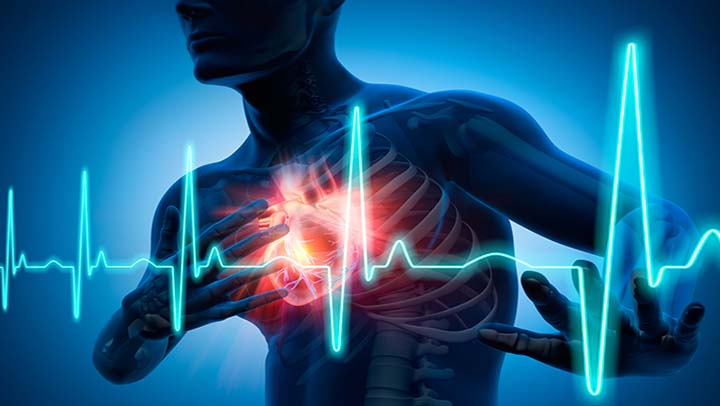

## **1. Carga Automtica**
---

A continuación se realiza la carga automática de los datos de insuficiencia cardiaca.


In [11]:
pip install kaggle


In [12]:
import os
from google.colab import files

# Subir el archivo kaggle.json
uploaded = files.upload()

# Crear el directorio .kaggle y mover el archivo
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')


Saving kaggle.json to kaggle.json


In [13]:
# Se extrae archivo
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data


Dataset URL: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 8.17MB/s]


In [14]:
#Se descomprime archivo
!unzip heart-failure-clinical-data.zip



Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  


In [15]:
import pandas as pd

# Se carga el dataset descomprimido
df_insuficiencia_cardiaca = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Se muestra primeras filas
print(df_insuficiencia_cardiaca.head())


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

***Campos:***

In [16]:

# Seleccionar las columnas específicas
columnas_lista = df_insuficiencia_cardiaca.columns.tolist()
print(columnas_lista)


['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


***Muestras:***

In [17]:
print(df_insuficiencia_cardiaca.iloc[57])  # Muestra un registro del DataFrame con predicción negativa a insuficiencia cardíaca


age                             60.0
anaemia                          1.0
creatinine_phosphokinase       607.0
diabetes                         0.0
ejection_fraction               40.0
high_blood_pressure              0.0
platelets                   216000.0
serum_creatinine                 0.6
serum_sodium                   138.0
sex                              1.0
smoking                          1.0
time                            54.0
DEATH_EVENT                      0.0
Name: 57, dtype: float64


In [18]:
print(df_insuficiencia_cardiaca.iloc[55])  # Muestra un registro del DataFrame con pediccion positiva a insuficiencia cardíaca


age                             95.0
anaemia                          1.0
creatinine_phosphokinase       371.0
diabetes                         0.0
ejection_fraction               30.0
high_blood_pressure              0.0
platelets                   461000.0
serum_creatinine                 2.0
serum_sodium                   132.0
sex                              1.0
smoking                          0.0
time                            50.0
DEATH_EVENT                      1.0
Name: 55, dtype: float64


### **1.1. Descripción de  Insuficiencia Cardíaca**

***Datos:***

In [19]:
import plotly.graph_objects as go

# Crear tabla interactiva
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df_insuficiencia_cardiaca.columns),
                fill_color='#003B5C',
                font=dict(color='white'),
                align='left'),
    cells=dict(values=[df_insuficiencia_cardiaca[col] for col in df_insuficiencia_cardiaca.columns],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(title="Datos de Insuficiencia Cardíaca")

#fig.write_image("Datos_Insuficiencia_Cardíaca.png")

fig.show()


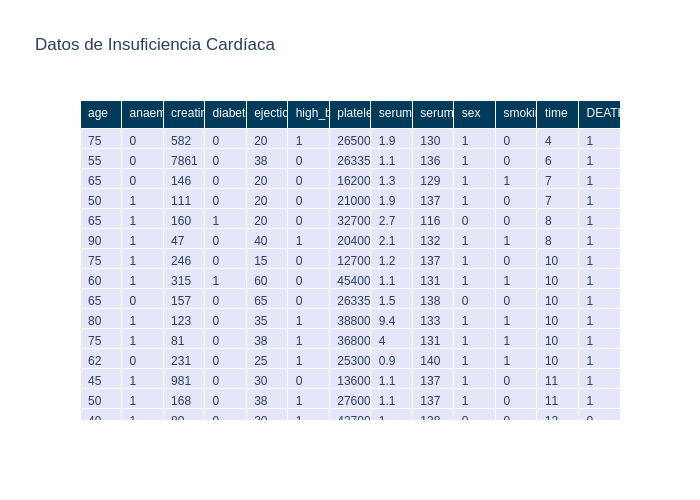

### **1.2. Histograma**

A continuación se muestra la información por histograma


In [20]:
!pip install kaleido


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00


In [21]:
import kaleido
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear subplots con 12 gráficos en una fila horizontal
fig = make_subplots(
    rows=1, cols=13,
    subplot_titles=df_insuficiencia_cardiaca.columns
)

# Color azul sector salud
health_blue = "#003B5C"  # Puedes ajustar este código de color según tus preferencias

# Añadir histogramas para cada columna
for i, column in enumerate(df_insuficiencia_cardiaca.columns[:13]):  # Asegúrate de usar un máximo de 12 columnas
    fig.add_trace(
        go.Histogram(
            x=df_insuficiencia_cardiaca[column],
            name=column,
            marker_color=health_blue
        ),
        row=1, col=i+1
    )

# Ajustar diseño
fig.update_layout(
    title_text="Histogramas de columnas para datos clínicos de insuficiencia cardíaca",
    height=400,  # Altura estándar
    width=2400,  # Ancho expandido para acomodar 12 gráficos
    showlegend=False,
    template="plotly_white",  # Fondo blanco profesional
    bargap=0.1  # Fondo blanco profesional
)

#fig.write_image("histogramas_insuficiencia_cardiaca.png")

# Mostrar la figura
fig.show()


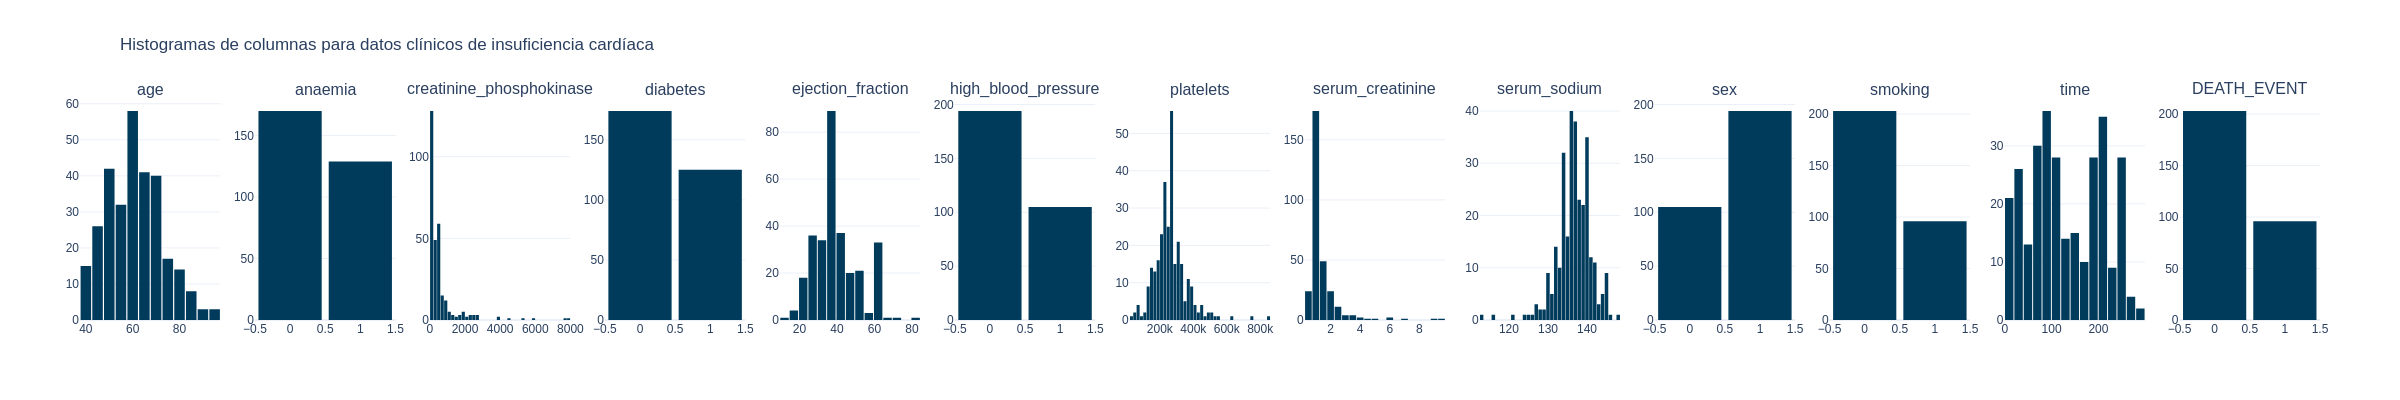

## **2. Versionado de los Datos**
---

A continuación se realiza el versionado de datos de suficiencia cardiaca en google drive.


In [22]:
!cat /etc/os-release

PRETTY_NAME="Ubuntu 22.04.3 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.3 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


In [2]:
!pip install dvc dvc-gdrive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.1/457.1 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.0/426.0 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.8/981.8 kB 40.7 MB/s eta 0:00:00
  

In [3]:
!dvc --version

3.58.0


In [4]:
import os
from IPython import get_ipython

In [5]:
!mkdir repositorioInsuficiencia
%cd repositorioInsuficiencia

/content/repositorioInsuficiencia


In [6]:
!git config --global user.email "ricartorres1@gmail.com"
!git config --global user.name "Ricardo Torres"
!git config --global init.defaultBranch master

In [7]:
!git init

Initialized empty Git repository in /content/repositorioInsuficiencia/.git/


In [8]:
!mkdir data

In [24]:
# Guardar el DataFrame como CSV en la carpeta 'data/'
df_insuficiencia_cardiaca.to_csv('data/insuficiencia_cardiaca.csv', index=False)

In [25]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	data/
	heart-failure-clinical-data.zip
	heart_failure_clinical_records_dataset.csv

nothing added to commit but untracked files present (use "git add" to track)


In [26]:
!dvc init

Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [27]:
!ls -a

.   data  .dvcignore  heart-failure-clinical-data.zip
..  .dvc  .git	      heart_failure_clinical_records_dataset.csv


In [28]:
!dvc add data/insuficiencia_cardiaca.csv

⠋ Checking graph
Adding...:   0% 0/1 [00:00<?, ?file/s{'info': ''}]
!
          |0.00 [00:00,     ?file/s]
                                    
!
  0% |          |0/? [00:00<?,    ?files/s]
                                           
Adding data/insuficiencia_cardiaca.csv to cache:   0% 0/1 [00:00<?, ?file/s]
  0% 0/1 [00:00<?, ?file/s{'info': ''}]                                     
                                       
  0% 0/1 [00:00<?, ?files/s]
  0% 0/1 [00:00<?, ?files/s{'info': ''}]
Adding...: 100% 1/1 [00:00<00:00, 11.92file/s{'info': ''}]

To track the changes with git, run:

	git add data/insuficiencia_cardiaca.csv.dvc data/.gitignore

To enable auto staging, run:

	dvc config core.autostage true


In [29]:
!ls -a data/

.  ..  .gitignore  insuficiencia_cardiaca.csv  insuficiencia_cardiaca.csv.dvc


In [30]:
!cat data/insuficiencia_cardiaca.csv.dvc

outs:
- md5: 3518e02af18217521d0d90a9e3ff7745
  size: 13493
  hash: md5
  path: insuficiencia_cardiaca.csv


In [31]:
!cat data/.gitignore

/insuficiencia_cardiaca.csv


In [32]:
!git add data/.gitignore data/*.csv.dvc

In [33]:
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   .dvc/.gitignore
	new file:   .dvc/config
	new file:   .dvcignore
	new file:   data/.gitignore
	new file:   data/insuficiencia_cardiaca.csv.dvc

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	heart-failure-clinical-data.zip
	heart_failure_clinical_records_dataset.csv



In [34]:
!git commit -m "Inicializamos dvc y agregamos el dataset de nombres"

[master (root-commit) 98e85b0] Inicializamos dvc y agregamos el dataset de nombres
 5 files changed, 12 insertions(+)
 create mode 100644 .dvc/.gitignore
 create mode 100644 .dvc/config
 create mode 100644 .dvcignore
 create mode 100644 data/.gitignore
 create mode 100644 data/insuficiencia_cardiaca.csv.dvc


In [35]:
drive_id = "1ERAn_NbRh37jSLl_Y6pDyQobJ49XYsg1" # reemplace aquí el id de su carpeta
os.environ["DRIVEID"] = drive_id

In [36]:
!dvc remote add -d -f storage "gdrive://$DRIVEID"

Setting 'storage' as a default remote.


In [37]:
!dvc remote modify storage gdrive_use_service_account true

In [38]:
import json
with open("../credentials.json") as f:
    os.environ["GDRIVE_CREDENTIALS_DATA"] = f.read()

In [39]:
!git add .dvc/config
!git commit -m "Agregamos drive remoto a dvc"

[master 780fcac] Agregamos drive remoto a dvc
 1 file changed, 5 insertions(+)


In [40]:
!dvc push

Pushing
!
  0% |          |0/? [00:00<?,    ?files/s]
                                           
!
  0% |          |0/? [00:00<?,    ?files/s]
                                           
Pushing to gdrive:   0% 0/1 [00:00<?, ?file/s]
Pushing to gdrive:   0% 0/1 [00:00<?, ?file/s{'info': ''}]
Pushing to gdrive:   0% 0/1 [00:00<?, ?file/s{'info': ''}]

  0% 0.00/13.2k [00:00<?, ?B/s]

  0% 0.00/13.2k [00:00<?, ?B/s{'info': ''}]

 61% 8.00k/13.2k [00:05<00:03, 1.37kB/s{'info': ''}]

                                                    
Pushing to gdrive: 100% 1/1 [00:07<00:00,  7.49s/file{'info': ''}]
Pushing
1 file pushed


## Créditos
---

**Profesor**

- [Jorge E. Camargo, PhD](https://dis.unal.edu.co/~jecamargom/)

**Asistente docente**:

- [Juan S. Lara MSc](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/)

**Diseño de imágenes:**
- [Brian Chaparro Cetina](mailto:bchaparro@unal.edu.co).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*